# Example 1: Scenario accessibility analysis

First import required libraries. Here we are using model-system data explorer, geopandas and matplotilib.

In [63]:
import os, sys
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

sys.path.append("../scripts/")
from data_explorer.scenario_data import ScenarioData

Then we'll load scenario data for scenario. Here we load data for 2023. 

Model-system results are stored in same `model-system/Results` folder so we can use relative paths to scenario data.

In [64]:
scenario1 = ScenarioData(
    name = "2023", 
    result_data_path = "../../model-system-data/Results/2023/", 
    base_data_path = "../../model-system-data/Base_input_data/2018_zonedata/", 
    scenario_data_path = "../../model-system-data/Scenario_input_data/2023/",
    spatial_data_path = "../../model-system-data/Base_input_data/Geospatial/"
)


Use subregion of Sourthern Finland

In [65]:
#scenario1.set_subregion("county", ["Pohjois-Savo"])

### Scenario results
Take a look at the data:

Below is accessibility for work tours, when all modes are available for the traveller. Accessibility is defined as expected maximum utility of all mode and destinations that are available for consumer. Plot shows deciles of this accessibility value, so that each bin has equal number of observations.

In [73]:
def get_weighted_bins(arr, weight, number_of_bins = 10)

    arr = data["hb_edu_basic"]
    cum_arr = arr.cumsum() / arr.sum()
    idx = np.searchsorted(cum_arr, np.linspace(0, 1, no_bins, endpoint=False)[1:])
    bins = np.split(arr, idx)

c:\Users\suppoatt\.virtualenvs\Scripts-w_cXNV7M\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:
c:\Users\suppoatt\.virtualenvs\Scripts-w_cXNV7M\lib\site-packages\geopandas\plotting.py:48: ShapelyDeprecationWarning: The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.
  if geom is not None and geom.type.startswith(prefix) and not geom.is_empty:


(6605921.95, 7776430.96)

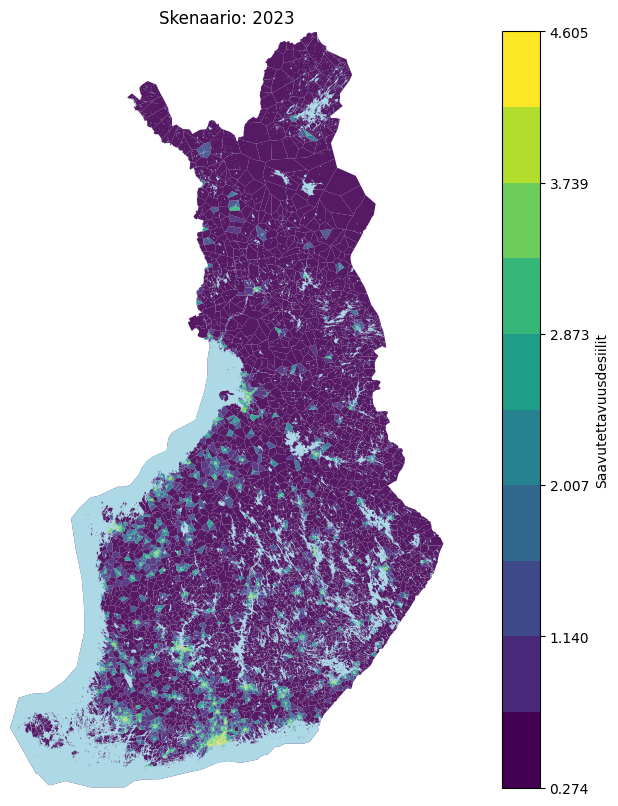

In [70]:
# Get accessibility data to geodataframe
data0 = scenario1.get_result_data("sustainable_accessibility.txt", geometry=True)
data1 = scenario1.get_input_data("2023.pop")
data = data0.merge(data1, on = "zone_id")
data["underage"] = data["population"] * data["sh_7-17"]

# Columns to use
column_name = "hb_edu_basic"
weight_col = "underage"

# Matplot
fig, ax = plt.subplots(figsize=(12, 8))
plt.style.use("default")

# Discrete colour scale
discrete_cmap = plt.cm.get_cmap("viridis")

# Set bins of 10 quantiles
_, bin_edges = np.histogram(data[column_name], bins = 10, weights=data[weight_col])
norm = mpl.colors.BoundaryNorm(bin_edges, discrete_cmap.N)  


# Visualize travel times into continuous coloring scheme
data.plot(ax=ax, column=column_name, linewidth=0.03, 
          cmap=discrete_cmap, norm=norm,
          alpha=0.9, legend=True, 
          legend_kwds={"label": "Saavutettavuusdesiilit", "orientation": "vertical"})

# Add links to plot
scenario1.basemap.plot(ax=ax, facecolor="#add8e6")

# Themes
ax.set_axis_off()
plt.tight_layout()
plt.title(f"Skenaario: {scenario1.name}")

# Set axis bb
xmin, ymin, xmax, ymax = data.total_bounds
pad = 0.05  # add a padding around the geometry
ax.set_xlim(xmin-pad, xmax+pad)
ax.set_ylim(ymin-pad, ymax+pad)